# Diplomado: Técnicas estadísticas y minería de datos
# Modulo II: Métodos Estadisticos
# Notebook Final Parte 3: Estadistica inferencial

# Eric Cuevas Aguilera

# Estadística Inferencial

#### Definicion

La **Estadística Inferencial** tiene como objetivo **extraer conclusiones** sobre una población a partir de una muestra.  
Para ello, se utilizan **estimadores** y **procedimientos inferenciales**, como los **intervalos de confianza** y las **pruebas de hipótesis**.


## Estimadores y sus propiedades

Un **estimador** es una función de los datos muestrales utilizada para **aproximar un parámetro poblacional** desconocido.  
Por ejemplo:

| Parámetro poblacional | Estimador muestral |
|------------------------|--------------------|
| Media $\mu$ | $\bar{X} = \frac{1}{n}\sum X_i$ |
| Varianza $\sigma^2$ | $S^2 = \frac{1}{n-1}\sum (X_i - \bar{X})^2$ |
| Proporción $p$ | $\hat{p} = \frac{x}{n}$ |


### Métodos para obtener estimadores


##### **Método de Momentos**

Consiste en igualar los **momentos teóricos** con los **momentos muestrales**.

$$
m_k = \frac{1}{n}\sum_{i=1}^n X_i^k \quad \longrightarrow \quad \mathbb{E}[X^k]
$$

El estimador se obtiene resolviendo el sistema resultante.  
Ejemplo: si $X \sim \text{Exp}(\lambda)$ con $\mathbb{E}[X] = 1/\lambda$, entonces:

$$
\hat{\lambda}_{MM} = \frac{1}{\bar{X}}
$$


##### **Estimador de Máxima Verosimilitud (EMV o MLE)**

Se elige el valor del parámetro $\theta$ que **maximiza la función de verosimilitud**:

$$
L(\theta) = \prod_{i=1}^{n} f(x_i; \theta)
$$

o equivalentemente, su logaritmo:

$$
\ell(\theta) = \ln L(\theta) = \sum_{i=1}^{n} \ln f(x_i; \theta)
$$

El estimador se obtiene resolviendo:

$$
\frac{d}{d\theta} \ell(\theta) = 0
$$

Ejemplo: para $X_i \sim N(\mu, \sigma^2)$ con $\sigma^2$ conocida,

$$
\hat{\mu}_{EMV} = \bar{X}
$$

### Propiedades de los estimadores

#### a) **Insesgadez**

Un estimador $\hat{\theta}$ es **insesgado** si:

$$
\mathbb{E}[\hat{\theta}] = \theta
$$

Si no se cumple, el **sesgo** se define como:

$$
\text{Sesgo}(\hat{\theta}) = \mathbb{E}[\hat{\theta}] - \theta
$$

#### b) **Consistencia**

$\hat{\theta}$ es **consistente** si:

$$
\hat{\theta} \xrightarrow{p} \theta \quad \text{cuando } n \to \infty
$$

Es decir, al aumentar el tamaño muestral, el estimador se aproxima al valor real del parámetro.


#### c) **Eficiencia**

Un estimador es **eficiente** si tiene la **menor varianza posible** entre los estimadores insesgados.  
En particular, se dice que un estimador es **eficiente asintóticamente** si su distribución tiende a la **Normal más concentrada** posible.


### Ejemplo: Estimación de $\lambda$ en una Exponencial

Sea $X_1, \dots, X_n \sim \text{Exp}(\lambda)$ con densidad $f(x; \lambda) = \lambda e^{-\lambda x}$.

1. **Por momentos:**

$$
\mathbb{E}[X] = \frac{1}{\lambda} \Rightarrow \hat{\lambda}_{MM} = \frac{1}{\bar{X}}
$$

2. **Por verosimilitud:**

$$
\ell(\lambda) = n\ln\lambda - \lambda\sum X_i \Rightarrow \hat{\lambda}_{EMV} = \frac{n}{\sum X_i} = \frac{1}{\bar{X}}
$$

Ambos métodos coinciden, y $\hat{\lambda}$ es **insesgado, consistente y eficiente**.


λ real = 2
Estimador por Momentos = 2.186
Estimador por Verosimilitud = 2.186
Sesgo estimado ≈ 0.018


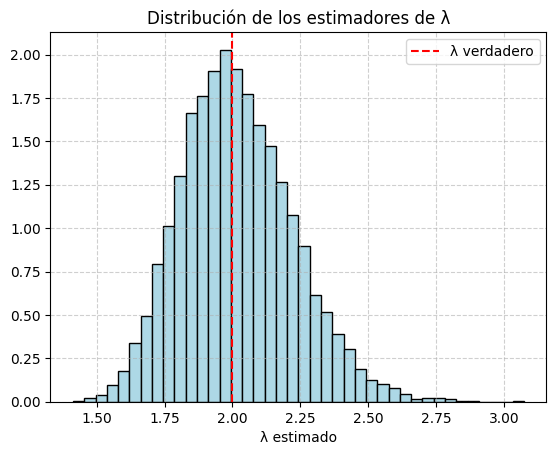

In [2]:
## Estimadores: Método de Momentos y Máxima Verosimilitud
## Ejemplo: estimación del parámetro λ en una distribución exponencial.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Simulación de datos
np.random.seed(42)
n = 100
lam_real = 2
muestra = np.random.exponential(1/lam_real, n)

# Método de Momentos
lambda_mm = 1 / np.mean(muestra)

# Máxima Verosimilitud (coincide para exponencial)
lambda_mle = n / np.sum(muestra)

# Resultados
print(f"λ real = {lam_real}")
print(f"Estimador por Momentos = {lambda_mm:.3f}")
print(f"Estimador por Verosimilitud = {lambda_mle:.3f}")

# Verificación de sesgo mediante simulación
Nsim = 10000
estimadores = [1 / np.mean(np.random.exponential(1/lam_real, n)) for _ in range(Nsim)]

print(f"Sesgo estimado ≈ {np.mean(estimadores) - lam_real:.3f}")

plt.hist(estimadores, bins=40, density=True, color='lightblue', edgecolor='black')
plt.axvline(lam_real, color='red', linestyle='--', label='λ verdadero')
plt.title("Distribución de los estimadores de λ")
plt.xlabel("λ estimado")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Intervalos de Confianza (IC)

#### Definicion

Un **intervalo de confianza** para un parámetro $\theta$ es un rango aleatorio que con una probabilidad $1 - \alpha$ contiene al valor verdadero de $\theta$.

$$
P(\theta_L \le \theta \le \theta_U) = 1 - \alpha
$$

donde:
- $\theta_L$ y $\theta_U$ son los **límites inferior y superior** del intervalo,
- $1 - \alpha$ es el **nivel de confianza** (comúnmente 0.90, 0.95 o 0.99).
- $\alpha$ es conocida como la Significancia


### Intervalo de confianza para la media (σ conocida)

Si $X_1, \dots, X_n \sim N(\mu, \sigma^2)$ con $\sigma$ conocida:

$$
\bar{X} \pm z_{\alpha/2}\frac{\sigma}{\sqrt{n}}
$$

### Intervalo de confianza para la media (σ desconocida)

Se usa la distribución $t$ de Student:

$$
\bar{X} \pm t_{\alpha/2,\, n-1}\frac{S}{\sqrt{n}}
$$


### Intervalo de confianza para una proporción

$$
\hat{p} \pm z_{\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$


### Distribuciones

#### Distribución Normal Estándar (Z)

Sea una variable aleatoria continua \( X \) con distribución normal de media \( \mu \) y varianza \( \sigma^2 \):

$$
X \sim N(\mu, \sigma^2)
$$

Si transformamos \( X \) mediante:

$$
Z = \frac{X - \mu}{\sigma}
$$

entonces \( Z \) sigue una **Distribución Normal Estándar**:

$$
Z \sim N(0,1)
$$

La función de densidad de probabilidad (f.d.p.) está dada por:

$$
f_Z(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2 / 2}, \quad z \in (-\infty, \infty)
$$

Propiedades:
1. $( \mathbb{E}[Z] = 0 )$
2. $( \text{Var}(Z) = 1 )$
3. La distribución es **simétrica respecto a 0**.
4. La probabilidad total bajo la curva es 1:
   $$
   \int_{-\infty}^{\infty} f_Z(z) \, dz = 1
   $$

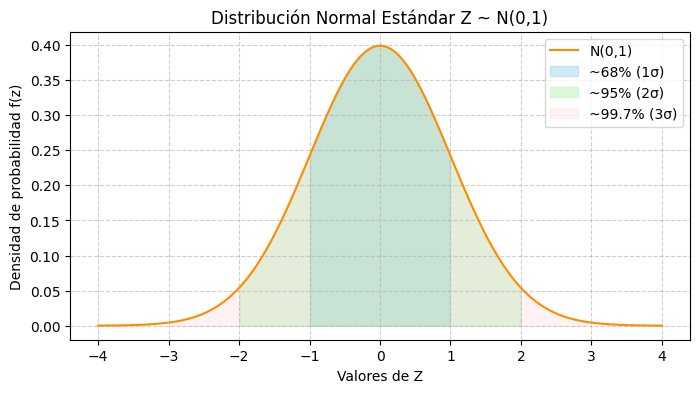

In [8]:
## Distribución Normal Estándar (Z)
# Si X ~ N(μ, σ²), entonces Z = (X - μ)/σ ~ N(0,1)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Rango de valores para Z
x = np.linspace(-4, 4, 400)

# Función de densidad
y = norm.pdf(x, 0, 1)

# Gráfica de la distribución
plt.figure(figsize=(8, 4))
plt.plot(x, y, color='darkorange', label='N(0,1)')
plt.fill_between(x, y, where=(x >= -1) & (x <= 1), color='skyblue', alpha=0.4, label='~68% (1σ)')
plt.fill_between(x, y, where=(x >= -2) & (x <= 2), color='lightgreen', alpha=0.3, label='~95% (2σ)')
plt.fill_between(x, y, where=(x >= -3) & (x <= 3), color='pink', alpha=0.2, label='~99.7% (3σ)')

# Personalización
plt.title('Distribución Normal Estándar Z ~ N(0,1)', fontsize=12)
plt.xlabel('Valores de Z')
plt.ylabel('Densidad de probabilidad f(z)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### Distribución Ji-Cuadrada (Chi-Cuadrada)

- Si $X\sim N(0,1)$
- $X^2 \sim \chi^{2}(1)$

y si

$$ \sum_{i=1}^n X_{i}^{2} \sim \chi^{2}(n) $$

donde $X_{i}$ son v.a.i. con distribución normal

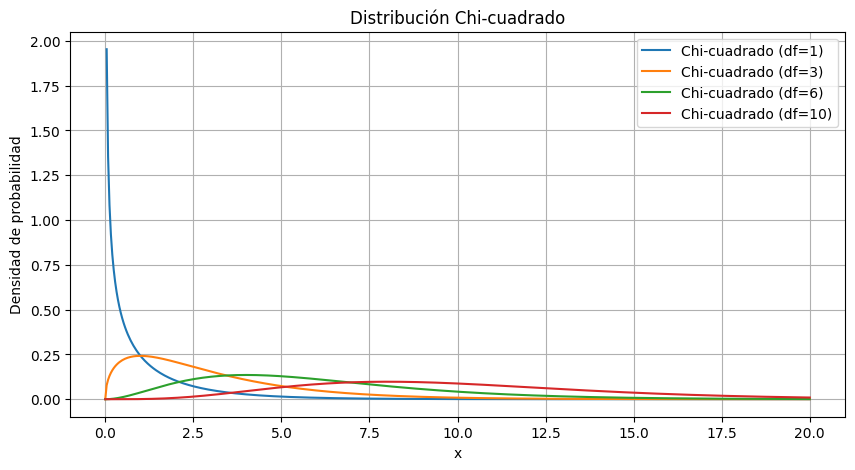

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Damos un rango de valores para las graficas
x_chi = np.linspace(0, 20, 500)

# Gráfica de la distribución Chi-cuadrado con diferentes grados de libertad
plt.figure(figsize=(10, 5))

df_chi_list = [1, 3, 6, 10] # Grados de libertad
for df in df_chi_list:
    plt.plot(x_chi, chi2.pdf(x_chi, df), label=f'Chi-cuadrado (df={df})')
plt.title('Distribución Chi-cuadrado')
plt.xlabel('x') # Etiqueta del eje x
plt.ylabel('Densidad de probabilidad') # Etiqueta del eje y
plt.legend()
plt.grid()
plt.show()

#### Distribución $t$ de Student

Sean
- $X\sim N(0,1)$
- $Y \sim \chi^2(n-1)$
Entonces
$$ T = \frac{X\cdot \sqrt{n}}{\sqrt{\frac{Y}{n-1}}} \sim t(n-1)$$

Podemos decir que

$$ \lim_{n\to\infty}t(n) = N(0,1) $$

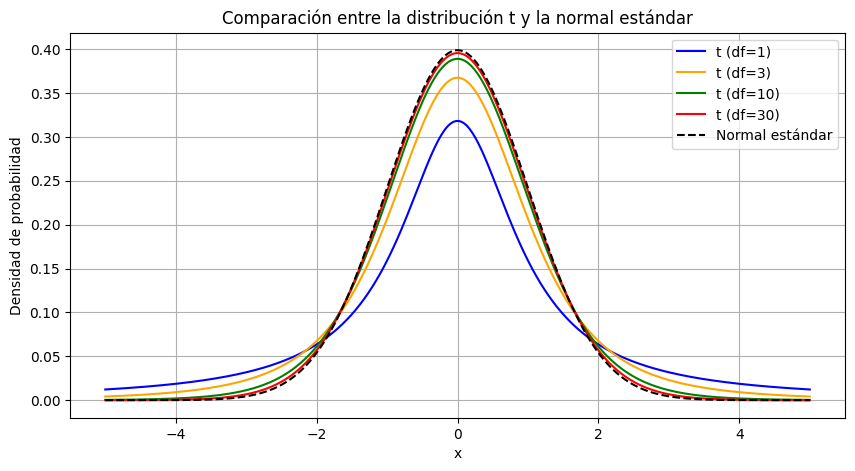

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# Damos un rango de valores para las graficas
x = np.linspace(-5, 5, 500)

dfs = [1,3,10,30]
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(10, 5))

# Graficamos las distribuciones t de Student
for df, color in zip(dfs, colors): # asignar un color diferente a cada df
    plt.plot(x, t.pdf(x, df), label=f't (df={df})', color=color)

# Graficamos la distribución normal estándar
plt.plot(x, norm.pdf(x), 'k--', label='Normal estándar')

plt.title('Comparación entre la distribución t y la normal estándar')
plt.xlabel('x') # Etiqueta del eje x
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid() 
plt.show()

#### Distribución F de Fisher

Se aplica al caso en el que tenemos dos muestras aleatorias:

$$ F = \frac{\chi^{2}_{(m-1)}/(m-1)}{\chi^{2}_{(n-1)}/(n-1)} \sim F(m-1,n-1)$$

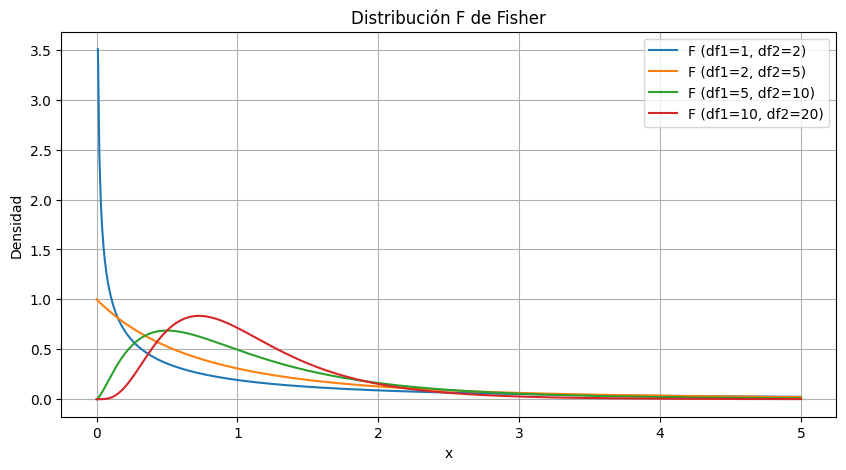

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Definimos un rango de valores
x = np.linspace(0, 5, 500)

# Lista de grados de libertad
df_lista = [(1,2),(2,5),(5,10),(10,20)] # (df1, df2)

plt.figure(figsize=(10, 5))

# Graficamos las distribuciones F de Fisher
for d1, d2 in df_lista:
    plt.plot(x, f.pdf(x, d1, d2), label=f'F (df1={d1}, df2={d2})')

plt.title('Distribución F de Fisher')
plt.xlabel('x') 
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show() 